# Red Wine

Para el siguiente proyecto se útiliza un data set de calidad de vinos [Wine Quality](https://www.kaggle.com/atharvachute/wine-quality-dataset). La data set contiene propiedades fisicoquímicas relacionadas con el vino tinto.

## Pregunta de investigación

¿Son las variables de parámetro gustativo útiles para predecir la nota de calidad del vino tinto?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
# Read the Wine quality data
da = pd.read_csv("../data/winequality_red.csv")
da.rename(columns = {'volatile acidity': 'volatile_acidity'}, inplace = True)

# Drop unused columns
cols = ["volatile_acidity", "alcohol", "pH", "quality"]
da = da[cols]

## Análisis de datos exploratorios

Al analizar la data, la variable alcohol según los expertos catadores depende mucho del gusto personal, por lo que quiero cuestinar primeramente la siguiente interrogante: ¿Existe una relación significativa (positiva) entre la calidad del vino tino y el grado de alcohol?

Al observar la gráfica podemos deducir que existe una relación lineal moderada positiva, por lo que en nuestro módelo analizaremos la variable del alcohol, juntamente con las variables que expliquen un parámetro gustativo. 

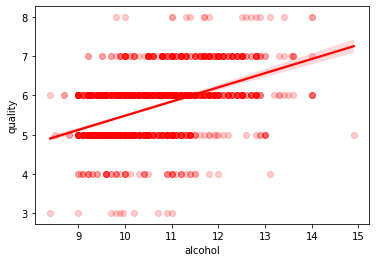

In [63]:
sns.regplot(x="alcohol", y="quality", data=da, color="red", fit_reg=True, scatter_kws={"alpha": 0.2})

In [59]:
np.corrcoef(da.quality,da.alcohol

array([[1.        , 0.47616632],
       [0.47616632, 1.        ]])

En el siguiente histograma podemos observar que la variable _`quality`_, es una distribución normal, centrada y con la mayoria de puntuaciones al rededor de 5 y 6.

<function matplotlib.pyplot.show(*args, **kw)>

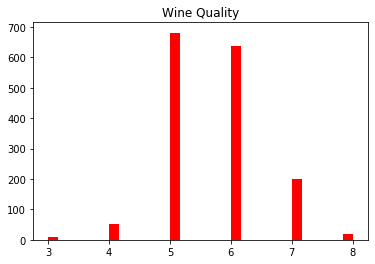

In [3]:
plt.hist(x = da.quality, bins='auto', color='red')
plt.title('Wine Quality')
plt.show

A continuación se expone la estadistica descriptiva de las variables que utilizaremos en el modelado, que nos ayudarán a enterder las variables objeto de estudio, su explicación se detalla más adelante en la sección de modelado.

In [43]:
da.describe()

,volatile_acidity,alcohol,pH,quality
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,10.422983,3.311113,5.636023
std,0.179060,1.065668,0.154386,0.807569
min,0.120000,8.400000,2.740000,3.000000
25%,0.390000,9.500000,3.210000,5.000000
50%,0.520000,10.200000,3.310000,6.000000
75%,0.640000,11.100000,3.400000,6.000000
max,1.580000,14.900000,4.010000,8.000000


## Modelado
Para el proyecto se utilizó una regresión lineal multiple, ya que la variable independiente _`quality`_, no era binaria. Las variables utilizadas en el modelo son las siguientes:

* _**Variable dependiente**:_ _`quality`_, esta es la variable resultado, define a calidad del vino en una escala de 1 a 10 por un catador, generalmente la nota se define considerando varios párametros, **"los visuales"**, por ejemplo: el color la densidad y el hierro y tambien **"los gustativos"**, por ejemplo: el grado de alcohólico, pH, Acidez Volátil.


* _**Variables independientes**:_ las variables que se eligieron para este modelo son parámetros **"gustativos"** , son variables que influyen la varible _`quality`_, las variables que se tomaron en consideración son las siguientes:


1. _`alcohol`_: Es una variable que determina el grado de alcohol, según [Joanna Vallejo](https://sommelieralacarta.com/6-par%C3%A1metros-que-miden-la-calidad-de-un-vino-2a8602eb19f5), los vinos tintos tiene de 12 a 16 grados de alcohol, y el grado de alcohol dependende la fermentación, el tipo de uvas y el clima, por ejemplo: en climas calidos, las uvas generan más azucar, por lo tanto más alcohol, lo contrario sucede en climas frios.

2. _`pH`_: Es una variable que determina el grado de acidez del vino, la fuerza relativa de esos ácidos. Es una medida logaritmica negativa de base 10, que se considera en una escala de 0 hasta 14, tomándose el 7 como neutro, siendo los valores más cercanos a 0 los que indican más acides y los valores más cercanos a 14 los que indican que es más alcalina o básica.

3. _`volatile acidity`_: Esta variable dotan al vino de la acidez necesaria para su mejor conservación, si los ácidos aumenta en cata se perciben en nariz y boca como avinagrados. La acidez volátil se expresa en g/L y normalmente estará según [Quercuslab](https://quercuslab.es/blog/determinacion-acidez-volatil-en-vinos/) entre 0,20 y 0,70 según el tipo de vino y proceso de elaboración.

_**Razonamiento de la elección de valiables**:_
Las variables que se eliguieron fueron debido a la relación que tenían para explicar párametros gustativos del vino tinto, relacionado a la sensación del sabor que estas variables proporcionan, y se excluyeron las variables que influyeran en los parámetros visuales, por ejemplo: _`density`_, o parametros más asociados a cualidades de conservación y que no afecta el sentido gustativo, por ejemplo: _`sulphates`_.

_**Interpretación de los coeficientes**:_

1. R-cuadrado es **0.323**, significa que el modelo explica el 32,3% de la varianza de la variable _`quality`_ . Casi un tercio de la justificación de la calidad del vino tinto es explicada por parametros gustativos del vino (alcohol, pH ya acidez volátil).

2. Significación de t:  _`P>|t|`_: Las variables de parametros gustativos sí explican la justificación de la calidad media del vino tinto, ya que la significación es menor de 0,05. 

3. De los coeficiente de las variables de parámetros gustativos, la que más explica la nota de calidad de los vinos tintos es _`volatile acidity`_, **1.28** porque está más alejada a 0, y _`alcohol`_, **0.32** es la que menos explica la relación con la nota de calidad de los vinos, porque está más cerca a 0.  

In [37]:
model = sm.OLS.from_formula("quality ~ alcohol + pH + volatile_acidity", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     253.3
Date:                Sun, 10 May 2020   Prob (F-statistic):          1.99e-134
Time:                        21:38:32   Log-Likelihood:                -1615.1
No. Observations:                1599   AIC:                             3238.
Df Residuals:                    1595   BIC:                             3260.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2688      0.369     11.569      0.000       3.545       4.993
alcohol              0.3299      0.017     19.947      0.000       0.298       0.362
pH                  -0.4219      0.115     -3.667      0.000      -0.648      -0.196
volatile_acidity    -1.2788      0.099    -12.902      0.000      -1.473      -1.084
==============================================================================
Omnibus:                       15.445   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.661
Skew:                          -0.070   Prob(JB):                     1.20e-05
Kurtosis:                       3.566   Cond. No.                         254.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_**Prediciendo una variable**_

Con los resultados anteriores, vamos a responder la siguiente pregunta:

Considerando solamente parámetros gustativos, ¿Cúal sería la calidad media de un vino tinto si el porcentaje de alcohol es menor al normal (9 grados), considerando los valores de la media de pH y volatile acidity? 

*  _`alcohol`_ = 9
*  _`pH`_ = 3.311113
*  _`volatile acidity`_ = 0.527821

quality predecido = 4.2688 + 0.3299(alcohol) - 0.4219(pH) - 1.2788 (volatile acidity)



In [10]:
prediction = (4.2688 + (0.3299 * 9 ) - (0.4219 * 3.311113) - (1.2788 * 0.527821))
print (prediction)

5.165963930499999


Considerando solamente parámetros gustativos, la calida media de un vino tinto estimada es **5.2** , si el porcentaje de alcohol es menor al normal (9 grados), considerando los valores de la media de pH y volatile acidity en la ecuación.

Se puede observa, un menor grado normal de alcohol en los vinos tintos tiene como resultado una media estimada de calidad de **5.2**,  que es menor a la media de las notas de cataciones tomadas **5.6**.

_**Grafica del modelo**_

Al observa la gráfica del modelo predictiva tomando como referencia los grados de alcohol, podemos concluir que aunque el alcohol es la variable que menos predice la nota de calificación de vino, esta si modifica el resultado, ya que con 95% de confianza el cambio promedio poblacional en el alcohol, para un incremento en un pH y un g/L de acidez volatil está estimado entre 0.298 y 0.362 grados de alcohol.

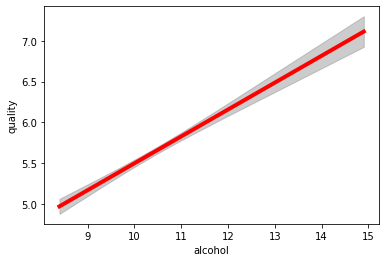

In [64]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = { "pH" : 3.311113, "volatile_acidity" : 0.527821 }

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "alcohol",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4, color='red')
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("alcohol")
_ = ax.set_ylabel("quality")

## Conclusiones

Al analizar los datos de este data set de vinos tintos, relacionada a la pregunta de investigación: ¿Son las variables de parámetro gustativo útiles para predecir la nota de calidad del vino tinto?, podemos concluir que las tres variables que se tomaron en consideración (alcohol, pH y acidez volátil), son utiles para predecir en cierta manera la calidad del vino tinto, aunque no estén tan estechamente relacionadas, ya que son factores que influencian en la percepción del catador. Para futuras investigaciones se podria incluir parámetros visuales que permitan, observar más variables indirectamente relacionadas que permitan ser un factor diferencial, en la busqueda de nuevas formas para sobresalir de la competencia.